## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import pandas as pd
import numpy as np

# Step 1. Read csv file
df = pd.read_csv('/drive/MyDrive/Colab_Notebooks/Data_Analyst_Course_HP/Module_6/Data_M6/data.csv')

# Step 2. Save column 'data' as numpy array
data = df['data'].to_numpy()


Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [3]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

Text(0.5, 1.0, 'Data Distribution')

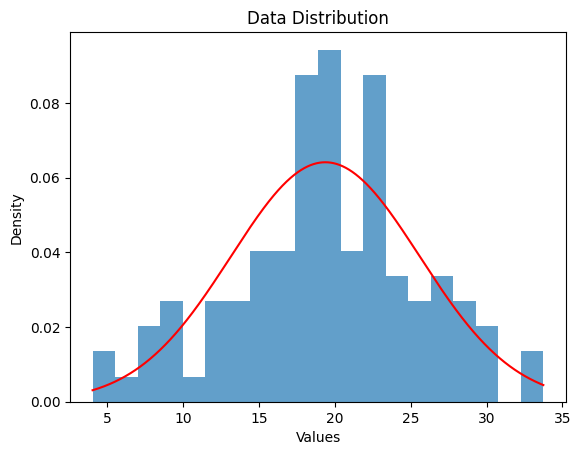

In [4]:
from scipy import stats
import matplotlib.pyplot as plt

x_axis = np.arange(data.min(), data.max(), 0.01)

# Step 1. Plot histogram of data
plt.hist(data, bins=20, density=True, alpha=0.7)

# Step 2. Add normal distribution curve
plt.plot(x_axis, stats.norm.pdf(x_axis, np.mean(data), np.std(data)), 'r-')

# Step 3. Add labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Data Distribution')

**Conclusion:**

1. The histogram shows the actual distribution of our data (blue bars)
2. The orange line represents the theoretical normal distribution
3. Data is roughly bell-shaped
4. here are some deviations from the ideal normal curve, especially in the central part
5. The overall distribution looks pretty close to normal

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

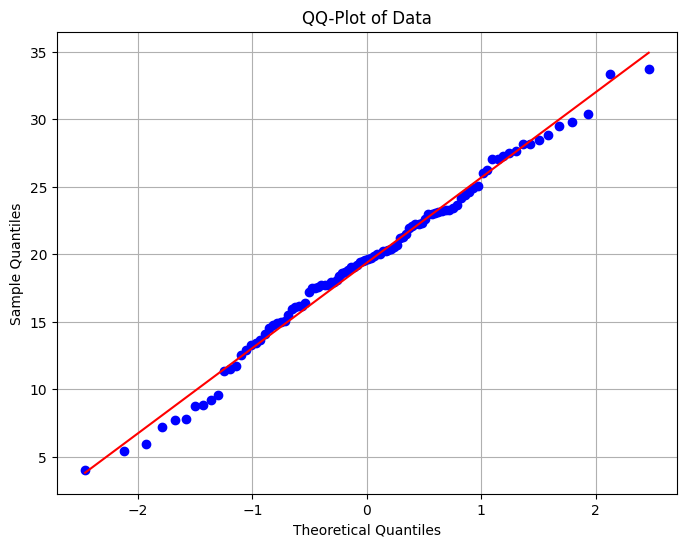

In [5]:
# Create QQ-Plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ-Plot of Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

**Conclusion:**

1. The points on the graph are quite close to the theoretical straight line, especially in the central part of the distribution
2. There are small deviations from the straight line at the edges (especially in the tails of the distribution)
3. The deviations are not critical and can be explained by random variation in the data
4. In general, the visual analysis of the QQ-Plot indicates that the data follows a normal distribution quite well.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [6]:
import scipy.stats as stats

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# Step 1. Set significance level
alpha = 0.05

print(f'p-value: {p_value:.4f}')

# Step 2. Make conclusion based on p-value
if p_value <= alpha:
    print("Since p-value <= alpha, we reject the null hypothesis.")
    print("The data is not normally distributed.")
else:
    print("Since p-value > alpha, we cannot reject the null hypothesis.")
    print("The data appears to be normally distributed.")


p-value: 0.5678
Since p-value > alpha, we cannot reject the null hypothesis.
The data appears to be normally distributed.


**Conclusion:**

1. p-value = 0.5678 (> 0.05)
2. Since the p-value is greater than the 0.05 significance level, we cannot reject the null hypothesis
3. This means that the data does not contradict the assumption of a normal distribution
4. This result is consistent with our previous visual observations (histogram and QQ-plot)